

> Indented block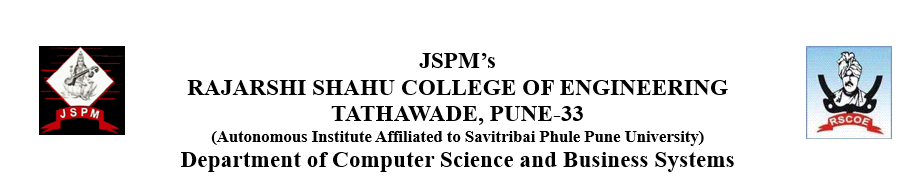



Name: Amaya Singh Thakur

Roll no.: RBT21CB048

Assignment no. 4 - Comparitive Analysis of all supervised learning algorithm

AIM -
Comparative analysis across supervised learning algorithms seeks to assess and contrast their efficacy on a designated dataset. The primary goal involves evaluating performance variations among diverse algorithms under scrutiny. Below are the primary intentions and aspects considered in conducting such an evaluation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/content/housing_in_london_yearly_variables.csv')

In [ ]:
data.head

<bound method NDFrame.head of            code                  area        date  median_salary  \
0     E09000001        city of london  1999-12-01        33020.0   
1     E09000002  barking and dagenham  1999-12-01        21480.0   
2     E09000003                barnet  1999-12-01        19568.0   
3     E09000004                bexley  1999-12-01        18621.0   
4     E09000005                 brent  1999-12-01        18532.0   
...         ...                   ...         ...            ...   
1066  K03000001         great britain  2019-12-01        30446.0   
1067  K04000001     england and wales  2019-12-01        30500.0   
1068  N92000002      northern ireland  2019-12-01        27434.0   
1069  S92000003              scotland  2019-12-01        30000.0   
1070  W92000004                 wales  2019-12-01        27500.0   

      life_satisfaction mean_salary recycling_pct  population_size  \
0                   NaN       48922             0           6581.0   
1            

In [ ]:
data.describe()

,median_salary,life_satisfaction,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
count,1049.000000,352.000000,1.018000e+03,9.310000e+02,6.660000e+02,6.660000e+02,1071.000000
mean,27977.792183,7.485057,6.042576e+06,3.188095e+06,3.724903e+05,8.814682e+05,0.647059
std,6412.807487,0.198451,1.526810e+07,8.058302e+06,2.157060e+06,3.690376e+06,0.478108
min,15684.000000,7.000000,6.581000e+03,4.700000e+04,3.150000e+02,5.009000e+03,0.000000
25%,23857.000000,7.350000,2.243458e+05,9.450000e+04,2.960000e+03,8.763550e+04,0.000000
50%,27441.000000,7.510000,2.946035e+05,1.570000e+05,4.323000e+03,1.024020e+05,1.000000
75%,30932.000000,7.640000,4.630098e+06,2.217000e+06,8.220000e+03,1.262760e+05,1.000000
max,61636.000000,7.960000,6.643555e+07,3.575000e+07,1.330373e+07,2.417217e+07,1.000000


In [ ]:
target_variable = 'borough_flag'

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [ ]:
le = LabelEncoder()
data['area'] = le.fit_transform(data['area'])

In [ ]:
features = ['median_salary', 'life_satisfaction', 'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs', 'area_size', 'no_of_houses']
X = data[features]
y = data[target_variable]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC()
naive_bayes_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
ann_model = MLPClassifier()

In [ ]:
import numpy as np

# Define columns that should be numeric
numeric_columns = ['median_salary', 'life_satisfaction', 'mean_salary', 'recycling_pct', 'population_size', 'number_of_jobs', 'area_size', 'no_of_houses']

# Convert non-numeric values to NaN in specified columns
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data.dropna(subset=numeric_columns, inplace=True)

# Verify the changes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 613 to 1013
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               265 non-null    object 
 1   area               265 non-null    object 
 2   date               265 non-null    object 
 3   median_salary      265 non-null    float64
 4   life_satisfaction  265 non-null    float64
 5   mean_salary        265 non-null    float64
 6   recycling_pct      265 non-null    float64
 7   population_size    265 non-null    float64
 8   number_of_jobs     265 non-null    float64
 9   area_size          265 non-null    float64
 10  no_of_houses       265 non-null    float64
 11  borough_flag       265 non-null    int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 26.9+ KB
None


In [ ]:
# Check for non-numeric values in each column
non_numeric_columns = X_train.columns[X_train.dtypes == 'object']
for column in non_numeric_columns:
    non_numeric_values = X_train[column].apply(lambda x: not isinstance(x, (int, float)))
    if non_numeric_values.any():
        print(f"Column '{column}' contains non-numeric values:")
        print(X_train[column][non_numeric_values])
        print("\n")

Column 'mean_salary' contains non-numeric values:
1010    32848
688     30371
243     37416
948     31049
798     28957
        ...  
330     28450
466     31842
121     32475
1044    41592
860     34231
Name: mean_salary, Length: 856, dtype: object


Column 'recycling_pct' contains non-numeric values:
1010    50
688     29
243     13
948     32
798     38
        ..
87      13
330     10
466     28
121      9
860     43
Name: recycling_pct, Length: 684, dtype: object




In [ ]:
# Convert 'mean_salary' and 'recycling_pct' columns to numeric, handling errors
X_train['mean_salary'] = pd.to_numeric(X_train['mean_salary'], errors='coerce')
X_train['recycling_pct'] = pd.to_numeric(X_train['recycling_pct'], errors='coerce')

# Drop rows with NaN values after conversion
X_train.dropna(subset=['mean_salary', 'recycling_pct'], inplace=True)

# Continue with the rest of the code for model training

In [ ]:
from sklearn.impute import SimpleImputer

# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Continue with the rest of your code using X_train_imputed

In [ ]:
# Drop rows with missing values
X_train.dropna(inplace=True)

# Continue with the rest of your code using X_train

In [ ]:
X_train.reset_index(drop=True, inplace=True)

# Verify that the shapes are consistent
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Ensure the indices match
assert X_train.index.equals(y_train.index[:X_train.shape[0]]), "Indices do not match between X_train and y_train."

X_train shape: (220, 8)
y_train shape: (856,)


In [ ]:
svm_model.fit(X_train, y_train[:X_train.shape[0]])
naive_bayes_model.fit(X_train, y_train[:X_train.shape[0]])
decision_tree_model.fit(X_train, y_train[:X_train.shape[0]])
knn_model.fit(X_train, y_train[:X_train.shape[0]])
ann_model.fit(X_train, y_train[:X_train.shape[0]])

MLPClassifier()

In [ ]:
X_test.reset_index(drop=True, inplace=True)

In [ ]:
# Identify columns with non-numeric values in X_test
non_numeric_columns_test = X_test.select_dtypes(exclude=['number']).columns
print("Columns with non-numeric values in X_test:", non_numeric_columns_test)

# Handle non-numeric values in X_test
X_test[non_numeric_columns_test] = X_test[non_numeric_columns_test].apply(pd.to_numeric, errors='coerce')

# Check for missing values in X_test
print("Missing values in X_test:", X_test.isnull().sum())

Columns with non-numeric values in X_test: Index(['mean_salary', 'recycling_pct'], dtype='object')
Missing values in X_test: median_salary          4
life_satisfaction    147
mean_salary            3
recycling_pct         39
population_size        8
number_of_jobs        23
area_size             92
no_of_houses          92
dtype: int64


In [ ]:
non_numeric_columns_test = X_test.select_dtypes(exclude=['number']).columns
print("Columns with non-numeric values in X_test:", non_numeric_columns_test)

# Handle non-numeric values in 'mean_salary' and 'recycling_pct'
X_test[['mean_salary', 'recycling_pct']] = X_test[['mean_salary', 'recycling_pct']].apply(pd.to_numeric, errors='coerce')

# Check for missing values in X_test
print("Missing values in X_test:", X_test.isnull().sum())

Columns with non-numeric values in X_test: Index([], dtype='object')
Missing values in X_test: median_salary          4
life_satisfaction    147
mean_salary            3
recycling_pct         39
population_size        8
number_of_jobs        23
area_size             92
no_of_houses          92
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [ ]:
svm_predictions = svm_model.predict(X_test_imputed)
naive_bayes_predictions = naive_bayes_model.predict(X_test_imputed)
decision_tree_predictions = decision_tree_model.predict(X_test_imputed)
knn_predictions = knn_model.predict(X_test_imputed)
ann_predictions = ann_model.predict(X_test_imputed)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
naive_bayes_classification_report = classification_report(y_test, naive_bayes_predictions)

In [ ]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_classification_report = classification_report(y_test, decision_tree_predictions)

In [ ]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)

In [ ]:
ann_accuracy = accuracy_score(y_test, ann_predictions)
ann_classification_report = classification_report(y_test, ann_predictions)

In [ ]:
print("SVM Accuracy:\n", svm_accuracy)
print("SVM Classification Report:\n", svm_classification_report)

print("\nNaive Bayes Accuracy:\n", naive_bayes_accuracy)
print("Naive Bayes Classification Report:\n", naive_bayes_classification_report)

print("\nDecision Tree Accuracy:\n", decision_tree_accuracy)
print("Decision Tree Classification Report:\n", decision_tree_classification_report)

print("\nk-NN Accuracy:\n", knn_accuracy)
print("k-NN Classification Report:\n", knn_classification_report)

print("\nANN Accuracy:\n", ann_accuracy)
print("ANN Classification Report:\n", ann_classification_report)

SVM Accuracy:
 0.6
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.60      1.00      0.75       129

    accuracy                           0.60       215
   macro avg       0.30      0.50      0.37       215
weighted avg       0.36      0.60      0.45       215


Naive Bayes Accuracy:
 0.26976744186046514
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.33      0.26        86
           1       0.34      0.23      0.28       129

    accuracy                           0.27       215
   macro avg       0.28      0.28      0.27       215
weighted avg       0.29      0.27      0.27       215


Decision Tree Accuracy:
 0.5488372093023256
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.70      0.55        86
           1       0.69    

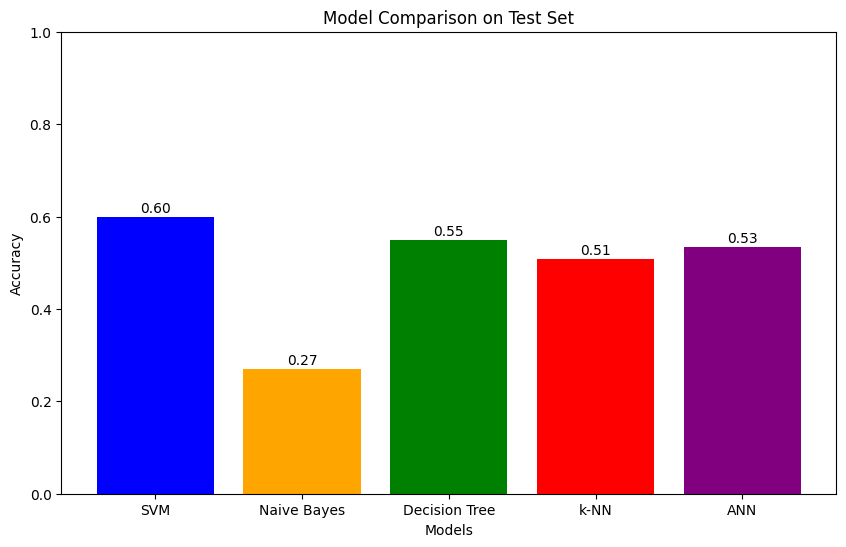

In [ ]:
import matplotlib.pyplot as plt

# List of model names
models = ['SVM', 'Naive Bayes', 'Decision Tree', 'k-NN', 'ANN']

# List of accuracies corresponding to each model
accuracies = [svm_accuracy, naive_bayes_accuracy, decision_tree_accuracy, knn_accuracy, ann_accuracy]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Model Comparison on Test Set')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set the y-axis limit to the range [0, 1]

# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')

# Show the plot
plt.show()


Conclusion: From the above graph we can see that SVM is most effective method for the above dataset